In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.impute  import SimpleImputer

from sklearn.metrics import confusion_matrix,classification_report
import os
for dirname, _, filenames in os.walk('Titanic-Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas

In [3]:
df = pandas.read_csv("Titanic-Dataset.csv")

In [4]:
df = pd.read_csv ("Titanic-Dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull() .sum()/ df.shape [0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
df.select_dtypes(exclude="number").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [10]:
df.select_dtypes(include="number").columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
df.drop(labels=['Name', 'Cabin', 'Embarked', 'Ticket','PassengerId'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


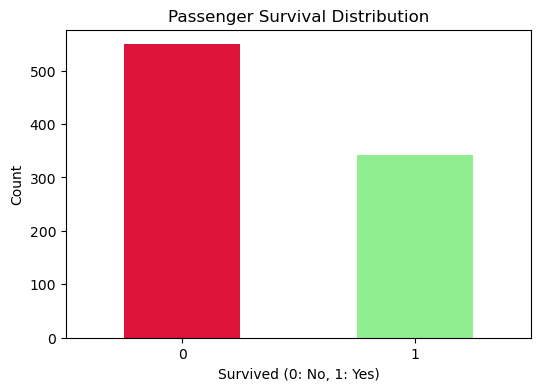

In [30]:
plt.figure(figsize=(6, 4))
df['Survived'].value_counts().plot(kind='bar', color=['crimson', 'lightgreen'])
plt.title('Passenger Survival Distribution')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Count')

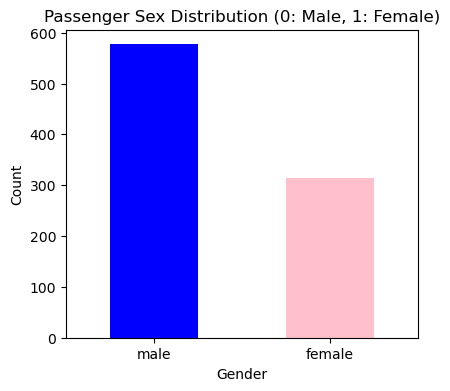

In [31]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Sex'].value_counts().plot(kind='bar', color=['blue', 
'pink'])
plt.title('Passenger Sex Distribution (0: Male, 1: Female)')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')

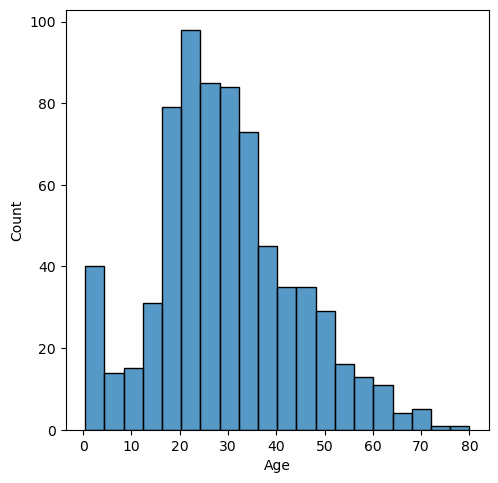

In [42]:
col=['Age']

plt.figure(figsize=(12,12))
for i,j in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.histplot(df[j])
plt.show()

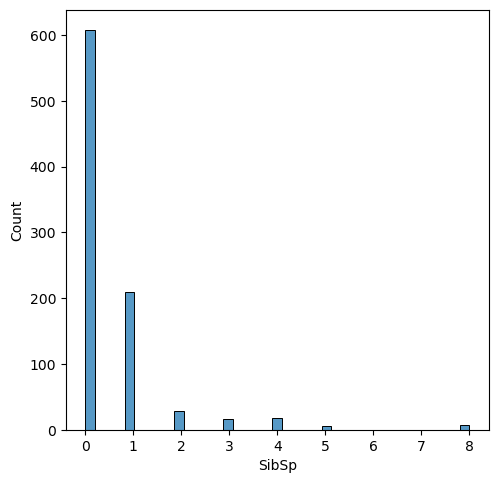

In [41]:
col=['SibSp']

plt.figure(figsize=(12,12))
for i,j in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.histplot(df[j])
plt.show()

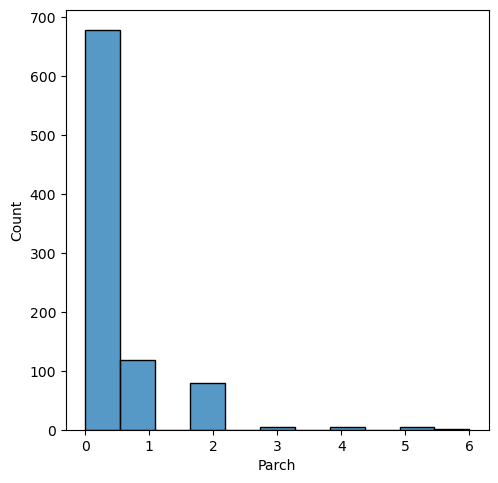

In [43]:
col=['Parch']

plt.figure(figsize=(12,12))
for i,j in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.histplot(df[j])
plt.show()

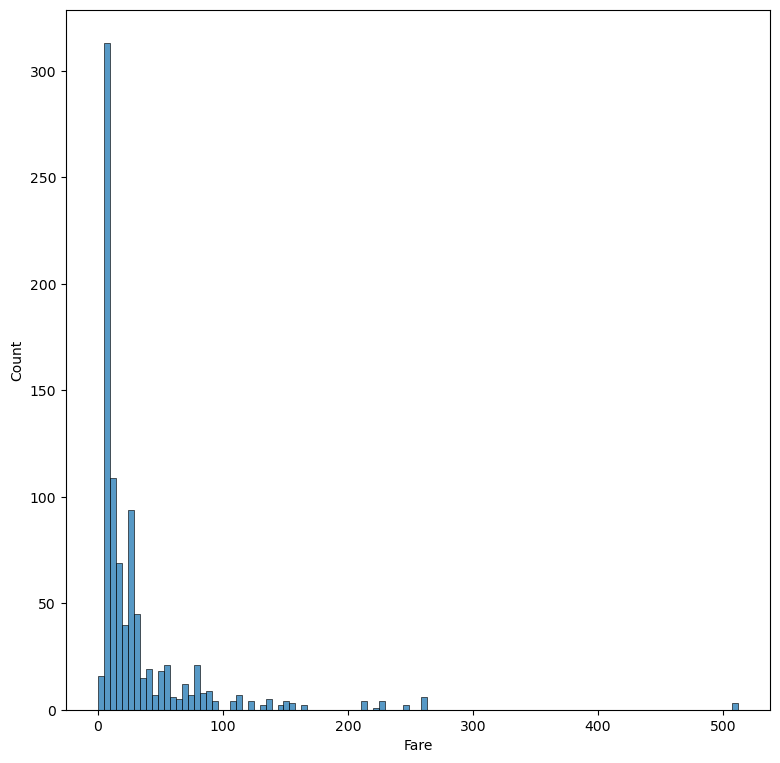

In [45]:
col=['Fare']

plt.figure(figsize=(20,20))
for i,j in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.histplot(df[j])
plt.show()

In [51]:
train_df= pd.read_csv("Titanic-Dataset.csv")

<Axes: xlabel='Sex', ylabel='Survived'>

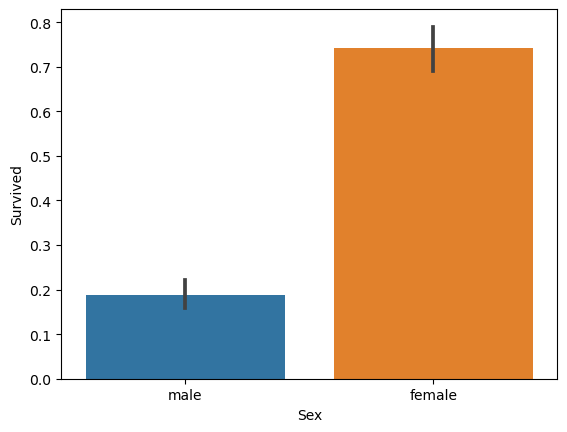

In [55]:
sns.barplot(data=train_df, x='Sex', y='Survived')

In [71]:
train_df["Age"].fillna(train_df["Age"].mean(), inplace = True)

In [72]:
train_df['Sex']=train_df['Sex'].replace('male', 0)
train_df['Sex']=train_df['Sex'].replace('female', 1)

In [89]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [90]:
X= train_df.drop('Survived', axis=1)
y= train_df['Survived']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [107]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [108]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [109]:
from sklearn.svm import SVC

SVC_model= SVC()

In [110]:
SVC_model.fit(scaled_X_train, y_train)

SVC()

In [111]:
y_pred= SVC_model.predict(scaled_X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[93,  6],
       [25, 55]])

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        99
           1       0.90      0.69      0.78        80

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179



In [114]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
grid_parameters = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV(svm,grid_parameters, cv=5)

In [115]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [116]:
grid_search.best_estimator_

SVC(C=1000, gamma=0.001)

In [117]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001}

In [118]:
y_pred_grid= grid_search.predict(X_test)

In [119]:
confusion_matrix(y_test, y_pred_grid)

array([[90,  9],
       [24, 56]])

In [120]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        99
           1       0.86      0.70      0.77        80

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

